# Exploratory Data Analysis (EDA)

The goal of this section/notebook will be to explore and investigate relationships within the dataset to develop a better understanding of the data. This will also be the section to identify and remove outliers, as well as perform efficiencies that will help improve the performance of a regression model by the end of the project. The priority during this stage is outlier removal, as we are prioritizing a low root mean squared error (RMSE) for our problem statement.

## Data and Package Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/train_clean.csv') # read in data

## Initial Exploration

In [3]:
df.drop(columns=['id']).describe() # removing ID from certain aspects of the EDA process as it will not be necessary.

,home_quality,home_sqft,garage_cars,home_age,yr_remod,full_bath,masonry_veneer_area,total_rooms_above_ground,sale_price
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,6.111816,3027.256348,1.776367,36.048828,1984.187500,1.577148,98.173340,6.433105,181533.495605
std,1.423749,933.250906,0.764240,30.198069,21.028396,0.549375,172.641918,1.548884,79281.454692
min,1.000000,334.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,2.000000,12789.000000
25%,5.000000,2384.000000,1.000000,7.000000,1964.750000,1.000000,0.000000,5.000000,129837.500000
50%,6.000000,2918.500000,2.000000,34.000000,1993.000000,2.000000,0.000000,6.000000,162500.000000
75%,7.000000,3548.250000,2.000000,54.000000,2004.000000,2.000000,158.500000,7.000000,214000.000000
max,10.000000,13170.000000,5.000000,136.000000,2010.000000,4.000000,1600.000000,14.000000,611657.000000


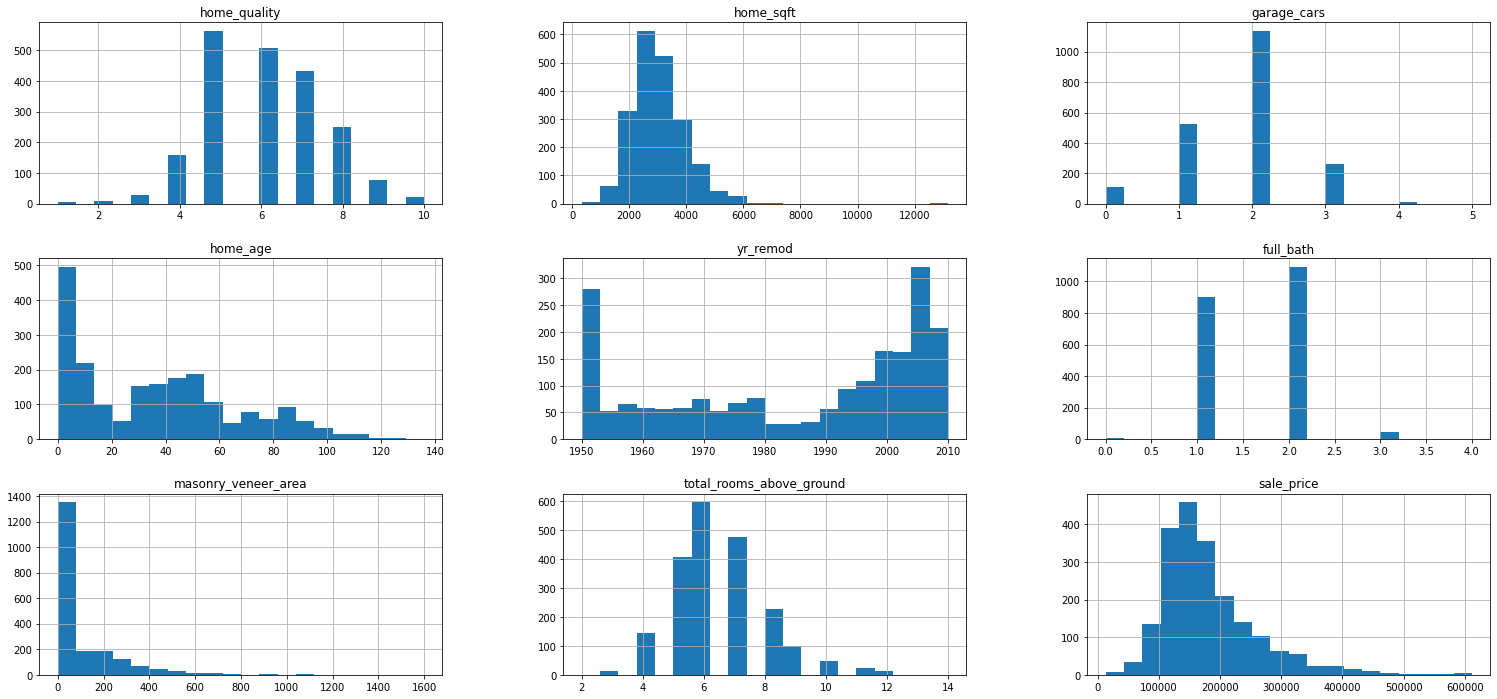

In [4]:
df.drop(columns=['id']).hist(bins=20, figsize=(26, 12));

We can tell from the histograms and the summary statistics that there are plenty of outliers within these variables that are skewing the data in certain ways. We see this most exaggerated in sale_price, masonry_veneer_area, and home_sqft. From this point, we can more easily visualize specific outliers and distributions with scatterplots and swarmplots. By doing this for all categorical and continuous variables (not including neighborhood and home_type), we will be able to effectively identify visually obvious outliers and remove them. While I could use boxplots to identify outliers with the 25th and 75th percentiles, that method would result in removing too much data, especially given the small amount of observations we already have. So, my method of seeing distributions and outliers of categorical variables is to use seaborn swarmplots.

## Outlier Removal

### Removing home_quality outliers

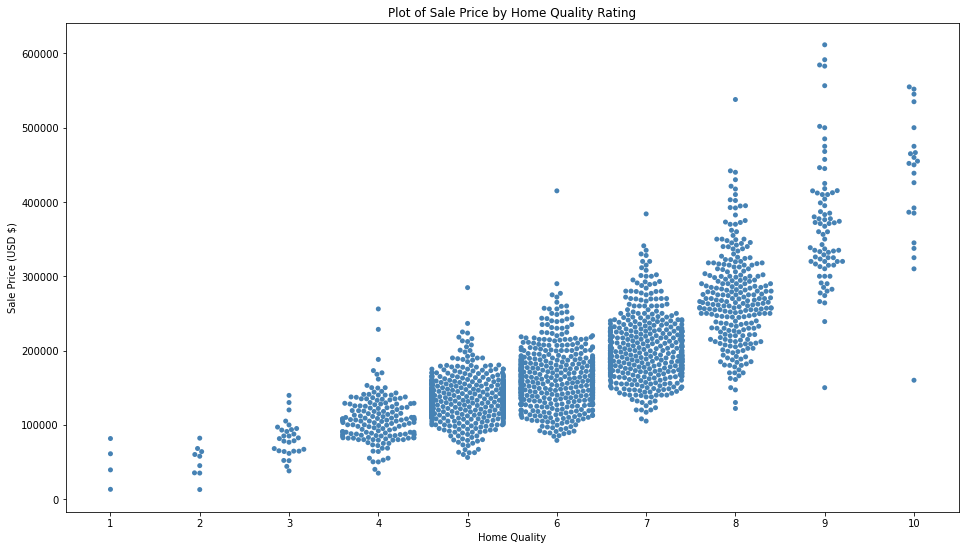

In [5]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Home Quality Rating')

sns.swarmplot(
    data=df,
    x='home_quality', 
    y='sale_price', 
    color='steelblue'
)

plt.xlabel('Home Quality')
plt.ylabel('Sale Price (USD $)');

Here we can see evident upper and lower outliers in home quality ratings 4 and above. We are going to remove these values, and continue the process for the rest of the features in the dataset in relation to sale_price. There is also a clear positive relationship between these two variables.

In [6]:
def drop_home_quality_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'home_quality' column."""
    df = df[~((df['home_quality'] == 4) & (df['sale_price'] > 200000))] # Removing top-end sale_price outliers in home_quality == 4
    df = df[~((df['home_quality'] == 5) & (df['sale_price'] > 240000))] # Removing top-end sale_price outliers in home_quality == 5
    df = df[~((df['home_quality'] == 6) & (df['sale_price'] > 300000))] # Removing top-end sale_price outliers in home_quality == 6
    df = df[~((df['home_quality'] == 7) & (df['sale_price'] > 350000))] # Removing top-end sale_price outliers in home_quality == 7
    df = df[~((df['home_quality'] == 8) & (df['sale_price'] > 500000))] # Removing top-end sale_price outliers in home_quality == 8
    df = df[~((df['home_quality'] == 9) & (df['sale_price'] > 510000))] # Removing top-end sale_price outliers in home_quality == 9
    df = df[~((df['home_quality'] == 9) & (df['sale_price'] < 200000))] # Removing low-end sale_price outliers in home_quality == 9
    df = df[~((df['home_quality'] == 10) & (df['sale_price'] < 200000))] # Removing low-end sale_price outliers in home_quality == 10

    print(df.shape)
    return df

df = drop_home_quality_outliers(df)

(2035, 12)


### Removing home_sqft outliers

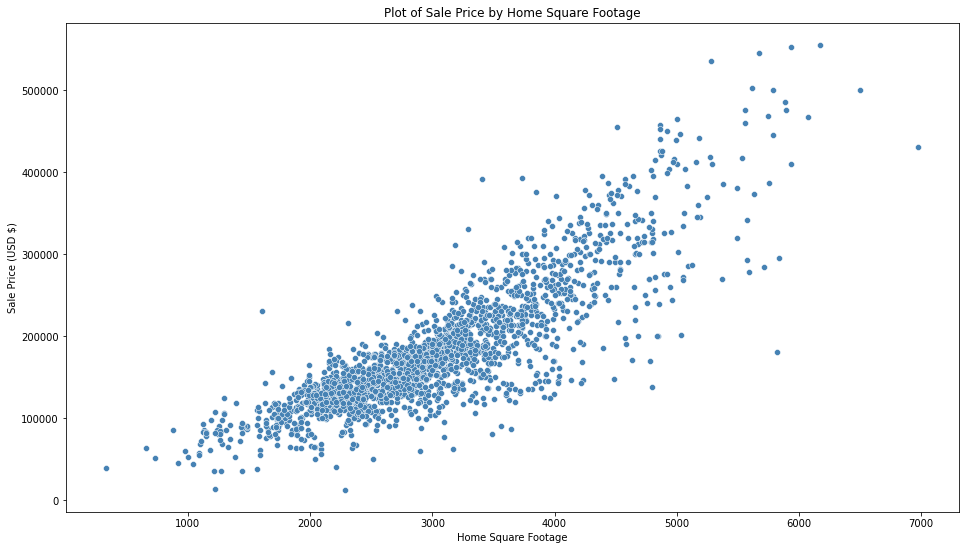

In [7]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Home Square Footage')

sns.scatterplot(
    data=df,
    x='home_sqft', 
    y='sale_price', 
    color='steelblue',
    alpha=1
)

plt.xlabel('Home Square Footage')
plt.ylabel('Sale Price (USD $)');

From this chart we can not only identify the outliers, but we can clearly see a trend suggesting a positive relationship between home square footage and sale price, re-enforcing our assumption of correlation between the two variables.

In [8]:
def drop_home_sqft_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'home_sqft' column."""
    df = df[~((df['home_sqft'] > 6300))] # Removing sqft outliers larger than 6300 sqft
    df = df[~((df['home_sqft'] > 1000) & (df['home_sqft'] < 2000) & (df['sale_price'] > 200000))] # Removing evident top-side outlier between 1000-2000 sqft
    df = df[~((df['home_sqft'] > 5000) & (df['home_sqft'] < 6000) & (df['sale_price'] < 200000))] # Removing evident bottom-end outlier between 5000-6000 sqft

    print(df.shape) # Printing dataframe shape to confirm
    return df

df = drop_home_sqft_outliers(df)

(2031, 12)


### Removing garage_cars outliers

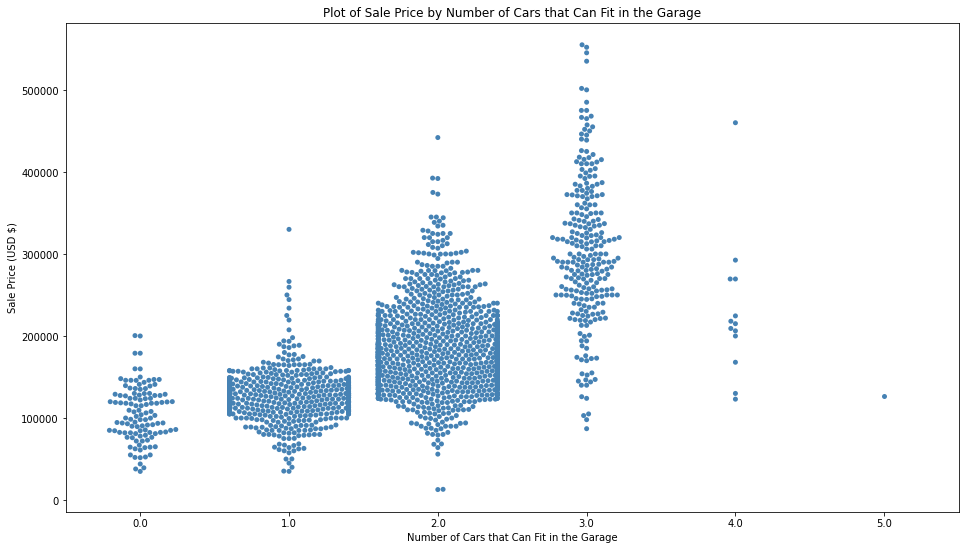

In [9]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Number of Cars that Can Fit in the Garage')

sns.swarmplot(
    data=df,
    x='garage_cars', 
    y='sale_price', 
    color='steelblue'
)

plt.xlabel('Number of Cars that Can Fit in the Garage')
plt.ylabel('Sale Price (USD $)');

Another clear trend that supports our assumption that garage_cars contributes to the value of sale_price.

In [10]:
def drop_garage_cars_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'garage_cars' column."""
    df = df[df['garage_cars'] < 4] # Removing the 4 and 5 car garages as they have very few observations that do not match up to the general trend.
    df = df[~((df['garage_cars'] == 1) & (df['sale_price'] > 300000))] # Removing evident top-side outlier in garage_cars == 1
    df = df[~((df['garage_cars'] == 2) & (df['sale_price'] < 50000))] # Removing evident bottom-side outliers in garage_cars == 2
    df = df[~((df['garage_cars'] == 2) & (df['sale_price'] > 350000))] # Removing the evident outliers from garage_cars in garage_cars == 2

    print(df.shape) # Printing dataframe shape to confirm
    return df

df = drop_garage_cars_outliers(df)

(2013, 12)


### Removing home_age outliers

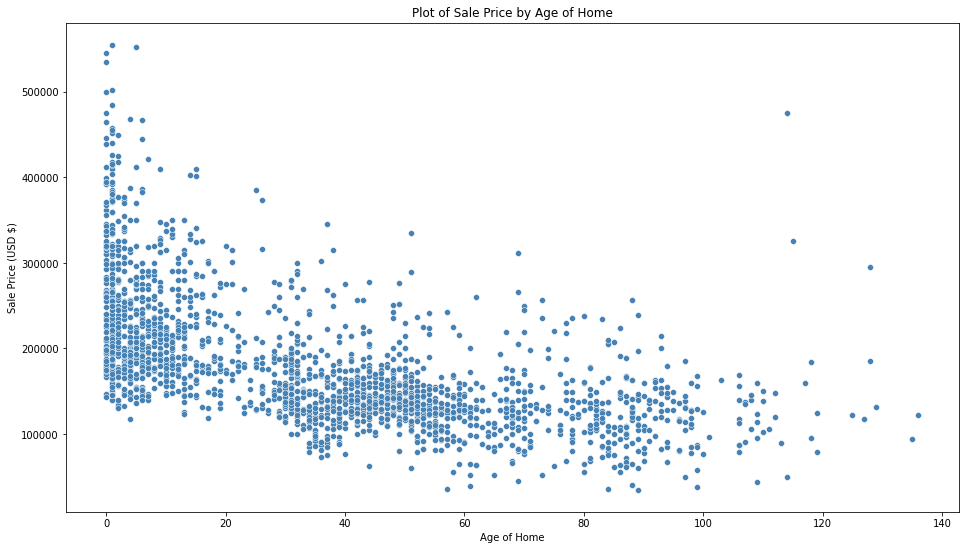

In [11]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Age of Home')

sns.scatterplot(
    data=df,
    x='home_age', 
    y='sale_price', 
    color='steelblue',
    alpha=1
)

plt.xlabel('Age of Home')
plt.ylabel('Sale Price (USD $)');

This scatterplot does not show as clear of a trend as other variables, however, it is still evident that as homes are constructed more recently (closer to 0 on the x-axis), sale price generally increases. Home age may not have as much of an effect on sale price, but it is still evident that there is a negative relationship.

In [12]:
def drop_home_age_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'home_age' column."""
    df = df[~((df['home_age'] > 100) & (df['sale_price'] > 250000))] # Removing the 3 evident outliers within home_age > 100

    print(df.shape) # Printing dataframe shape to confirm
    return df

df = drop_home_age_outliers(df)

(2010, 12)


### Removing yr_remod outliers

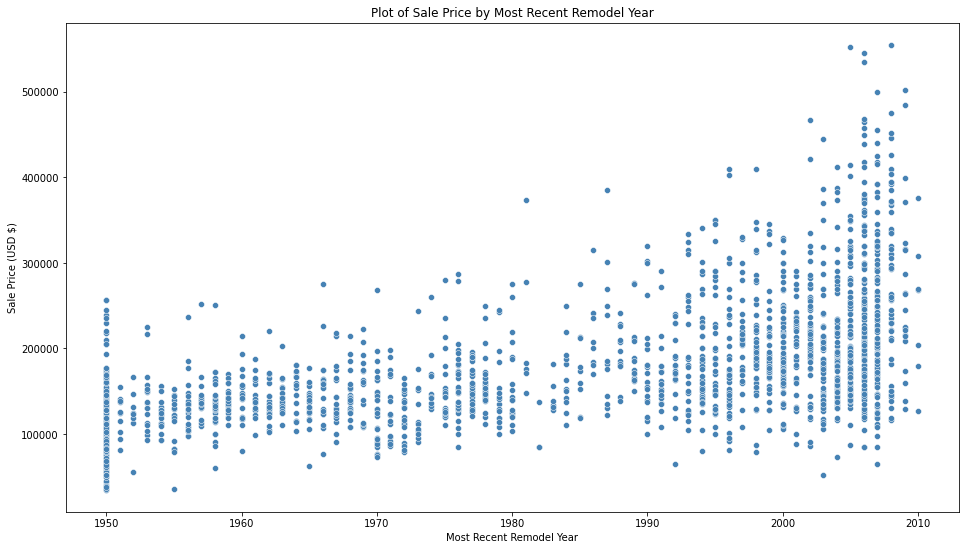

In [13]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Most Recent Remodel Year')

sns.scatterplot(
    data=df,
    x='yr_remod', 
    y='sale_price', 
    color='steelblue',
    alpha=1
)

plt.xlabel('Most Recent Remodel Year')
plt.ylabel('Sale Price (USD $)');

The strength of the relationship between these two variables is similar to the strength of the relationship between home_age and sale_price.

In [14]:
def drop_yr_remod_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'yr_remod' column."""
    df = df[~((df['yr_remod'] > 1980) & (df['yr_remod'] < 1990) & (df['sale_price'] > 340000))] # Removing the 2 evident outliers between 1980 and 1990

    print(df.shape) # Printing dataframe shape to confirm
    return df

df = drop_yr_remod_outliers(df)

(2008, 12)


### Removing full_bath outliers

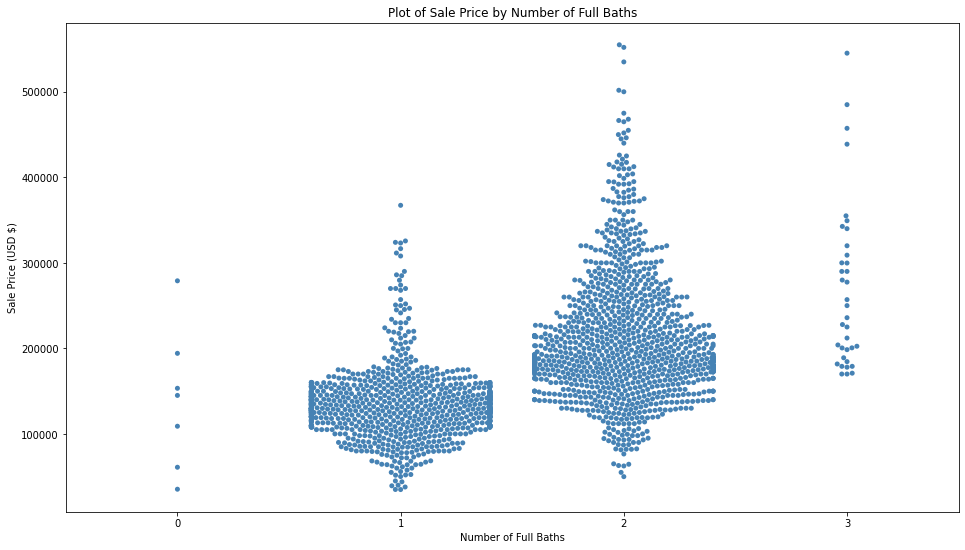

In [15]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Number of Full Baths')

sns.swarmplot(
    data=df,
    x='full_bath', 
    y='sale_price', 
    color='steelblue'
)

plt.xlabel('Number of Full Baths')
plt.ylabel('Sale Price (USD $)');

Here we see most of the homes in the dataset have either 1 or 2 full baths. It would be optimal to remove 0 and 3 as those groups of data do not have many observations and will likely skew model accuracy. There is a very clear distinction and positive relationship between the price differences of homes with 1 full bathroom vs. homes with 2 full bathrooms.

In [16]:
def drop_full_bath_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'full_bath' column."""
    df = df[(df['full_bath'] == 1) | (df['full_bath'] == 2)] # Only including full_bath == 1 or 2
    df = df[~((df['full_bath'] == 1) & (df['sale_price'] > 350000))] # Removing the 1 top-end outlier in full_bath == 1
    df = df[~((df['full_bath'] == 2) & (df['sale_price'] > 500000))] # Removing observations with 2 full bathrooms and sold for $500k or more

    print(df.shape) # Printing dataframe shape to confirm
    return df

df = drop_full_bath_outliers(df)

(1959, 12)


### Removing masonry_veneer_area outliers

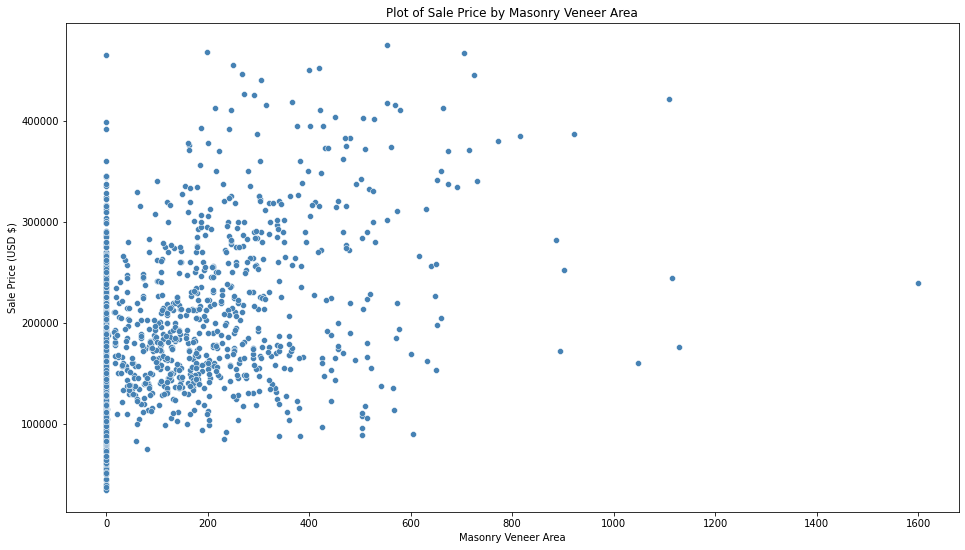

In [17]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Masonry Veneer Area')

sns.scatterplot(
    data=df,
    x='masonry_veneer_area', 
    y='sale_price', 
    color='steelblue',
    alpha=1
)

plt.xlabel('Masonry Veneer Area')
plt.ylabel('Sale Price (USD $)');

There is not as clear of a relationship between these two variables, likely because masonry veneer is an optional feature of a house. However, RMSE is higher and R^2 / accuracy scores are lower without this variable, suggesting that there is a relationship between these two variables.

In [18]:
df = df[~(df['masonry_veneer_area'] > 830)] # Removing the evident outliers from masonry_veneer_area

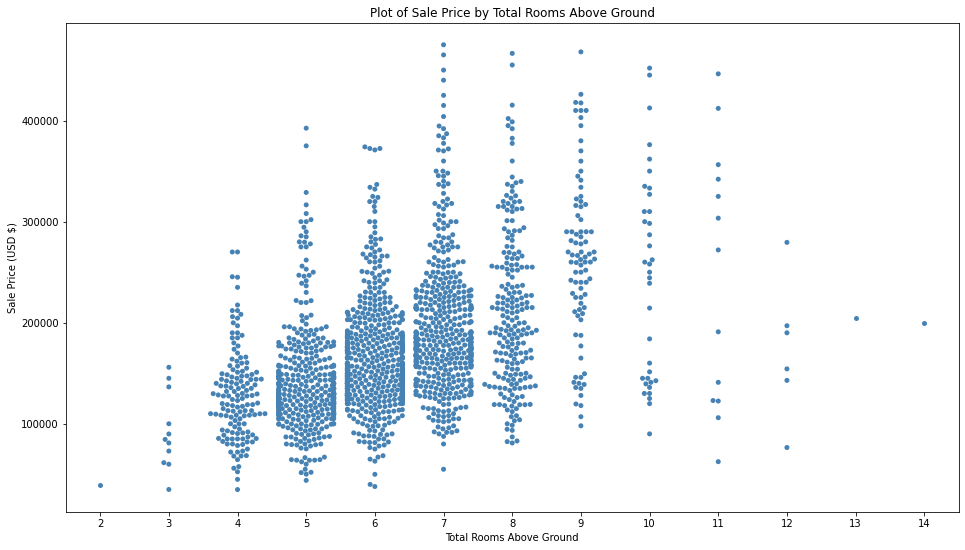

In [19]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Total Rooms Above Ground')

sns.swarmplot(
    data=df,
    x='total_rooms_above_ground', 
    y='sale_price', 
    color='steelblue'
)

plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price (USD $)');

There is a clear trend and positive relationship between these two variables up until 10 rooms.

In [20]:
def remove_tot_rms_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'total_rooms_above_ground' column."""
    df = df[(df['total_rooms_above_ground'] < 10) & (df['total_rooms_above_ground'] > 3)] # only including observations of homes between 4 and 9 rooms. The observations with 2-3 rooms may be insignificant and skew the model.
    df = df[~((df['total_rooms_above_ground'] == 5) & (df['sale_price'] > 350000))] # removing clear outliers on the top-end of homes with 5 rooms
    df = df[~((df['total_rooms_above_ground'] == 6) & (df['sale_price'] > 350000))] # removing clear outliers on the top-end of homes with 6 rooms
    df = df[~((df['total_rooms_above_ground'] == 7) & (df['sale_price'] < 70000))] # removing clear outliers on the bottom-end of homes with 7 rooms
    df = df[~((df['total_rooms_above_ground'] == 8) & (df['sale_price'] > 450000))] # removing clear outliers on the top-end of homes with 8 rooms
    df = df[~((df['total_rooms_above_ground'] == 9) & (df['sale_price'] > 450000))] # removing clear outliers on the top-end of homes with 9 rooms
    
    return df

df = remove_tot_rms_outliers(df)
df.shape

(1871, 12)

### Removing home_type outliers

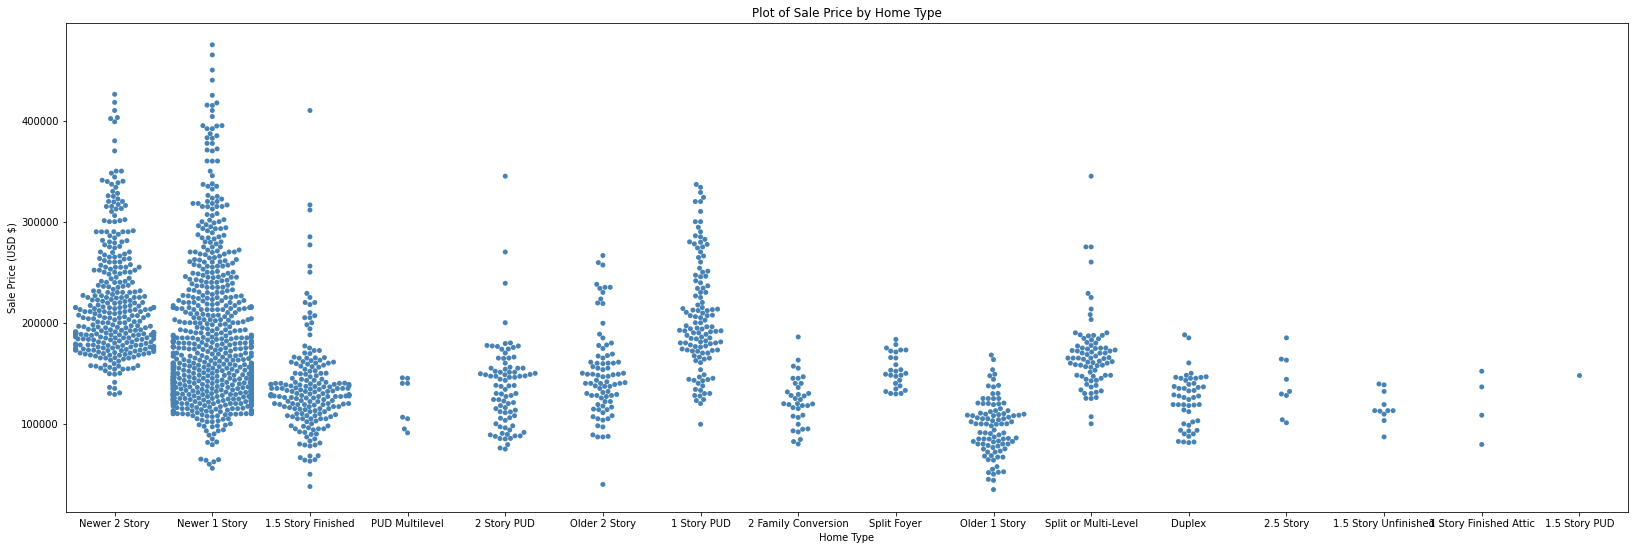

In [21]:
plt.figure(figsize=(28,9))
plt.title('Plot of Sale Price by Home Type')

sns.swarmplot(
    data=df,
    x='home_type', 
    y='sale_price', 
    color='steelblue'
)

plt.xlabel('Home Type')
plt.ylabel('Sale Price (USD $)');

This chart shows the clustered groups of home price as a result of home type. Some home type categories are very small, and it would be better removing them, while some have extreme outliers that need to be removed.

In [22]:
def remove_tot_rms_outliers(df):
    """Returns a new DataFrame that no longer has outliers for the 'home_type' column."""
    df = df[~((df['home_type'] == 'PUD Multilevel') | (df['home_type'] == '1.5 Story PUD') | (df['home_type'] == 'Story Finished Attic') | (df['home_type'] == '1.5 Story Unfinished') | (df['home_type'] == '2.5 Story'))] # removing groups with small number of observations
    df = df[~((df['home_type'] == '1.5 Story Finished') & (df['sale_price'] > 350000))] # removing clear outlier on the top-end of 1.5 story finished homes
    df = df[~((df['home_type'] == '2 Story PUD') & (df['sale_price'] > 200000))] # removing clear outliers on the top-end of 2 Story PUD
    df = df[~((df['home_type'] == 'Split or Multi-Level') & (df['sale_price'] > 250000))] # removing clear outliers on the top-end of Split or Multi-Level homes
    df = df[~((df['home_type'] == 'Older 2 Story') & (df['sale_price'] < 70000))] # removing clear outlier on the bottom-end of Older 2 Story homes
    
    return df

df = remove_tot_rms_outliers(df)
df.shape

(1833, 12)

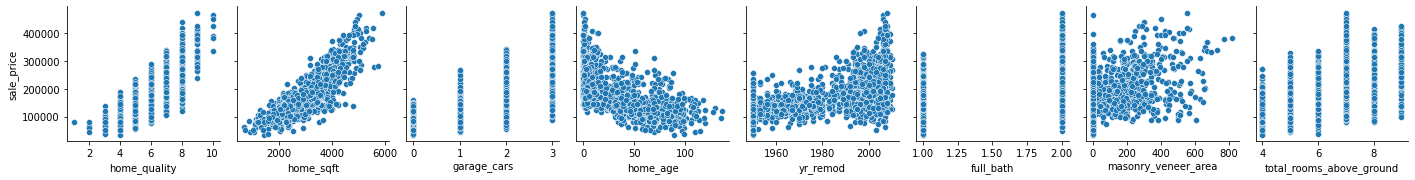

In [25]:
sns.pairplot(
    data=df,
    x_vars=df.drop(columns=['sale_price','id','neighborhood','home_type']),
    y_vars=['sale_price']
); 

It is very likely that we will be able to answer the problem statement with these variables, as we can clearly see strong positive or negative relationships between most of these feature variables and our sale price.

## Output CSV

In [26]:
df.to_csv('../data/train_clean.csv', index=False) # Overwrite the original cleaned csv to use in the preprocessing and modeling stages.